In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DF 불러오기

In [2]:
df = pd.read_csv('./datasets/전용면적_85이하.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,25,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,18000
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,55200
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,14,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,36800
3,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,30300
4,강남구,2016-01-01,50.67,4,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,34,83.3,1175.45,99.6,177.148845,0.14,1060.74,0.7,87000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436011,강서구,2022-12-31,84.98,15,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,5,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,113500
436012,송파구,2022-12-31,84.71,11,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.2,138000
436013,송파구,2022-12-31,84.90,24,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,14,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.0,172000
436014,양천구,2022-12-31,64.02,5,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,26,105.0,1260.92,99.1,169.662386,0.39,1824.40,0.4,37000


In [3]:
# 컬럼 선택
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리','건물연식', 'GDP대비가계부채비율','EPU', '장단기금리spread','LTV', '물건금액(만원)']]

# Train/Test Split


In [4]:
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])
train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']

C:\Users\이은진\AppData\Local\Temp\ipykernel_19368\2269776461.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['계약일'] = pd.to_datetime(df['계약일'])


## feature & target split

In [5]:
# Train Split
# feature & target  split

X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']

# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

In [6]:
# Test Split
# feature & target  split

X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']

# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

# Scaling
1. Features - minMax
2. Target - Log 

In [7]:
# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [8]:
# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)
y_test_scaled

365652    4.716003
365653    4.722634
365654    4.380211
365655    5.079181
365656    4.361728
            ...   
436011    5.054996
436012    5.139879
436013    5.235528
436014    4.568202
436015    4.883661
Name: 물건금액(만원), Length: 70364, dtype: float64

# OLS 확인

In [9]:
# OLS_확인
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y_scaled , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               물건금액(만원)   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                 3.753e+04
Date:                Wed, 05 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:28:27   Log-Likelihood:             1.1780e+05
No. Observations:              365652   AIC:                        -2.356e+05
Df Residuals:                  365643   BIC:                        -2.355e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.3577      0.003   1513.826      0.000       4.352       4.363
건물면적(㎡)         0.5432      0.001    441.738      0.000       0.541       0.546
층               0.2932      0.004     82.318      0.000       0.286       0.300
Fed기준금리        -0.1114      0.002    -67.941      0.000      -0.115      -0.108
건물연식           -0.0395      0.002    -20.673      0.000      -0.043      -0.036
GDP대비가계부채비율     0.1369      0.002     66.413      0.000       0.133       0.141
EPU            -0.0244      0.002    -14.182      0.000      -0.028      -0.021
장단기금리spread     0.0109      0.001      7.350      0.000       0.008       0.014
LTV            -0.1984      0.002   -105.121      0.000      -0.202      -0.195
==============================================================================
Omnibus:                    20757.078   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26283.821
Skew:                           0.559   Prob(JB):                         0.00
Kurtosis:                       3.688   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VIF 확인

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif

In [11]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor      Feature
0    9.954971      건물면적(㎡)
1    5.138220            층
2    4.334792      Fed기준금리
3    5.419050         건물연식
4    5.451802  GDP대비가계부채비율
5    3.478732          EPU
6    8.511075  장단기금리spread
7    8.673380          LTV


# LinearRegression

## CV - R2, MSE

In [12]:
# X_test 컬럼 -> X_scaled 기준(train)으로 맞추기  
X_test_scaled=X_test_scaled[X_scaled.columns]

## 교차검증

In [13]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(model, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.44515,           Validation Score_r2 = 0.3341
      Train Score_mse = 0.03171,           Validation Score_mse = 0.02748


Fold 2: Train Score_r2 = 0.46188,           Validation Score_r2 = 0.32398
      Train Score_mse = 0.03136,           Validation Score_mse = 0.02901


Fold 3: Train Score_r2 = 0.47336,           Validation Score_r2 = 0.31826
      Train Score_mse = 0.03067,           Validation Score_mse = 0.03187


Fold 4: Train Score_r2 = 0.46764,           Validation Score_r2 = 0.25295
      Train Score_mse = 0.0283,           Validation Score_mse = 0.04719


Fold 5: Train Score_r2 = 0.40547,           Validation Score_r2 = 0.39249
      Train Score_mse = 0.03064,           Validation Score_mse = 0.03712


CV 평균 R2 : 0.3244
CV 평균 MSE : 0.0345


# 평가지표 train and test 시각화

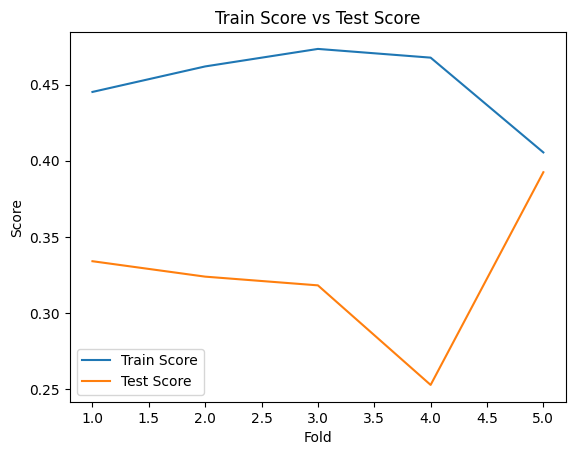

In [14]:
# R2
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

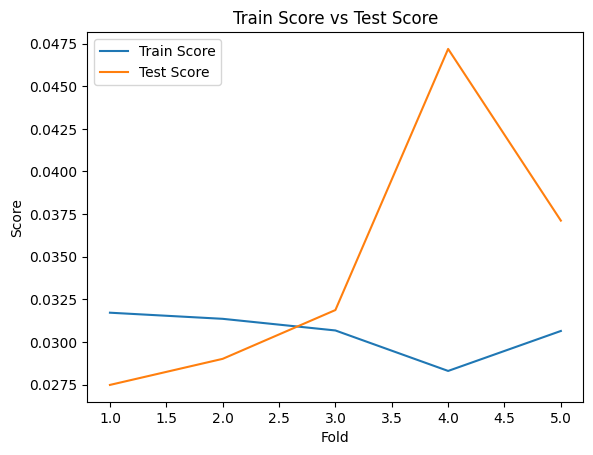

In [15]:
# MSE 
import matplotlib.pyplot as plt

train_scores = -cv_results['train_neg_mean_squared_error']
test_scores = -cv_results['test_neg_mean_squared_error']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

# Model 확정
- R2 그래프상 train & test 점수차이가 가장 적게 나는 모델 확정
- 최종 다섯 번째로 확정

In [16]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][4].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.051, RMSE :  0.225, MAE: 0.225
Variance score :  0.518




In [17]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= cv_results['estimator'][4].coef_, index = X_scaled.columns)

test_result.columns = ['회귀계수']

test_result.sort_values('회귀계수', ascending=False)

,회귀계수
건물면적(㎡),0.551897
층,0.314956
GDP대비가계부채비율,0.107052
장단기금리spread,-0.012760
EPU,-0.040458
건물연식,-0.051686
Fed기준금리,-0.131991
LTV,-0.207104


# Ridge & Lasso

## Ridge

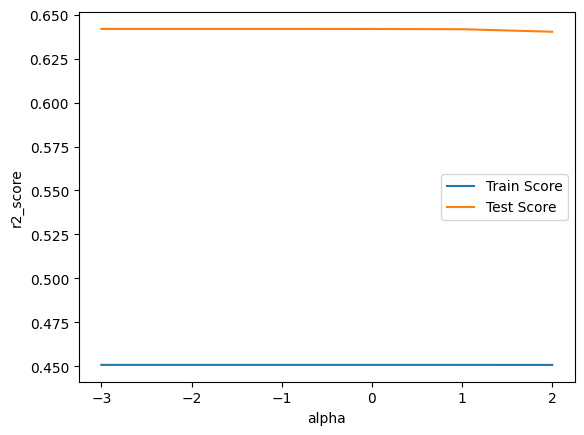

In [18]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y_scaled)
    train_score.append(ridge.score(X_scaled, y_scaled))
    test_score.append(ridge.score(X_test_scaled, y_test_scaled))

plt.plot(np.log10(alpha_list), train_score, label='Train Score')
plt.plot(np.log10(alpha_list), test_score, label='Test Score')
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.legend()
plt.show()

- 기본값 alpha = 1.0으로 진행

# CV

In [19]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(ridge, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.44515,           Validation Score_r2 = 0.33412
      Train Score_mse = 0.03171,           Validation Score_mse = 0.02748


Fold 2: Train Score_r2 = 0.46188,           Validation Score_r2 = 0.324
      Train Score_mse = 0.03136,           Validation Score_mse = 0.02901


Fold 3: Train Score_r2 = 0.47336,           Validation Score_r2 = 0.31828
      Train Score_mse = 0.03067,           Validation Score_mse = 0.03187


Fold 4: Train Score_r2 = 0.46764,           Validation Score_r2 = 0.253
      Train Score_mse = 0.0283,           Validation Score_mse = 0.04719


Fold 5: Train Score_r2 = 0.40547,           Validation Score_r2 = 0.39283
      Train Score_mse = 0.03064,           Validation Score_mse = 0.0371


CV 평균 R2 : 0.3244
CV 평균 MSE : 0.0345


# 평가지표 train and test 차이 시각화

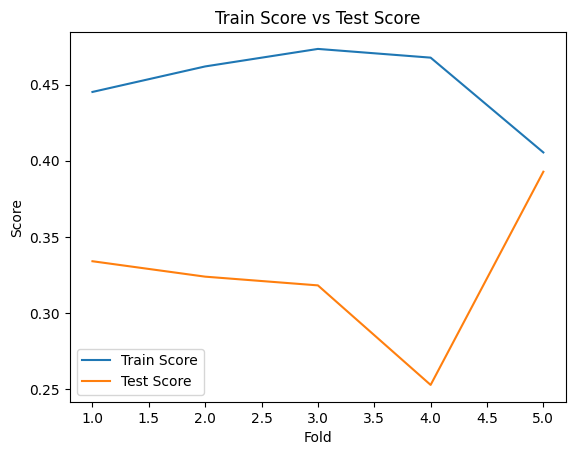

In [20]:
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

In [21]:
# ridge의 train, test r2 확인
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
print(ridge.score(X_scaled, y_scaled))
print(ridge.score(X_test_scaled, y_test_scaled))

0.4508879903399251
0.6418183299472753


In [22]:
# 최종 모델 - Predict & 평가지표
# Train 전체로 학습 시
ridge.fit(X_scaled, y_scaled)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.038, RMSE :  0.194, MAE: 0.194
Variance score :  0.642




In [23]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][4].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.051, RMSE :  0.225, MAE: 0.225
Variance score :  0.518




In [24]:
# Ridge 회귀계수
ridge_df = pd.DataFrame(data =  cv_results['estimator'][4].coef_, index = X_scaled.columns)
ridge_df.columns = ['회귀계수']
ridge_df.sort_values(by = '회귀계수',ascending=False)

,회귀계수
건물면적(㎡),0.535527
GDP대비가계부채비율,0.362445
층,0.271631
Fed기준금리,-0.006598
LTV,-0.014522
EPU,-0.024953
건물연식,-0.035347
장단기금리spread,-0.043557


In [25]:
# Lasso 
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_scaled, y_scaled)
print(lasso.score(X_scaled, y_scaled))
print(lasso.score(X_test_scaled, y_test_scaled))

0.0
-0.12223556156610971


In [26]:
lasso.coef_ == 0

array([ True,  True,  True,  True,  True,  True,  True,  True])